In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
deliveries =  pd.read_csv('deliveries.csv')
matches=pd.read_csv('matches.csv')

In [4]:
deliveries.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [4]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [99]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


<AxesSubplot:title={'center':'Maximim Balls Faced'}>

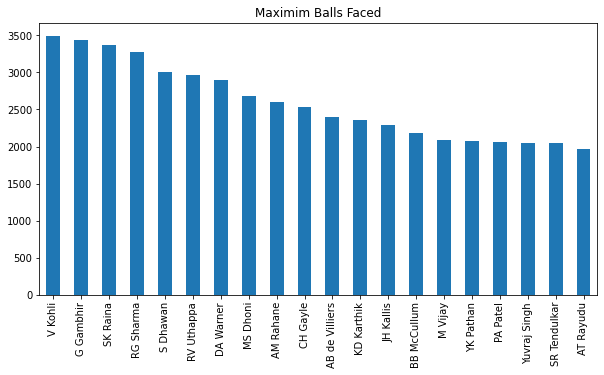

In [160]:
plt.figure(figsize=(10,5))
deliveries['batsman'].value_counts().head(20).plot(kind='bar',title='Maximim Balls Faced')

<AxesSubplot:title={'center':'Maximim Runs Scored'}, xlabel='batsman'>

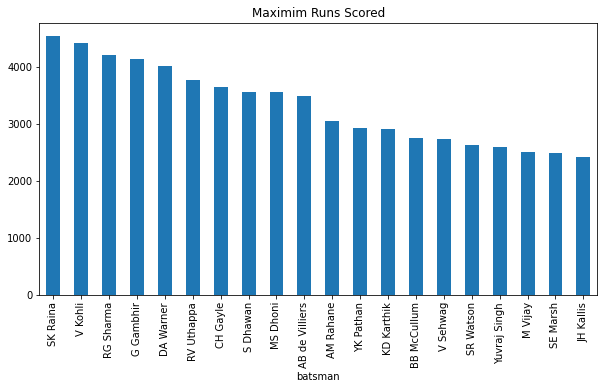

In [161]:
plt.figure(figsize=(10,5))
deliveries.groupby(by='batsman').sum().sort_values('batsman_runs',ascending=False).batsman_runs.head(20).plot(kind='bar',title='Maximim Runs Scored')

<AxesSubplot:title={'center':'Players with Maximum Strike Rate'}>

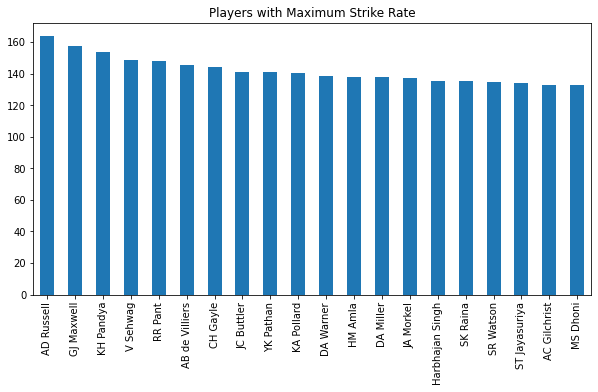

In [142]:
plt.figure(figsize=(10,5))

total_runs=deliveries.groupby(by='batsman').sum().sort_values('batsman_runs',ascending=False).batsman_runs
total_balls=deliveries.batsman.value_counts()
strike_rate=total_runs/total_balls*100
strike_rate.name='Strike_Rate'
#strike_rate=strike_rate.sort_values(ascending=False).head(20)
batsman_analysis=pd.concat([total_runs,total_balls,strike_rate],axis=1)
batsman_analysis=batsman_analysis[batsman_analysis['batsman']>300]
batsman_analysis.sort_values('Strike_Rate',ascending=False).head(20).Strike_Rate.plot(kind='bar', title='Players with Maximum Strike Rate')

<AxesSubplot:title={'center':'Players with Maximum Strike Rate in the last five overs'}>

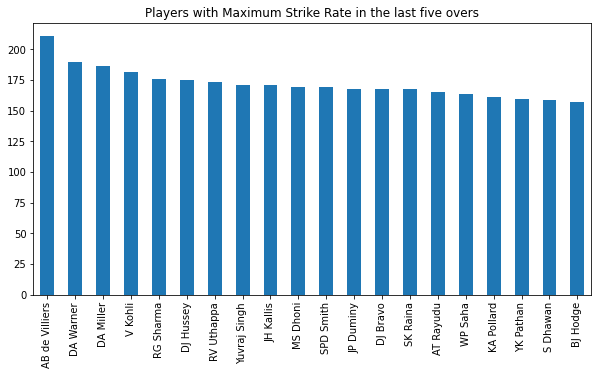

In [8]:
plt.figure(figsize=(10,5))

total_runs=deliveries[deliveries['over']>15].groupby(by='batsman').sum().sort_values('batsman_runs',ascending=False).batsman_runs
total_balls=deliveries[deliveries['over']>15].batsman.value_counts()
strike_rate=total_runs/total_balls*100
strike_rate.name='Strike_Rate'
#strike_rate=strike_rate.sort_values(ascending=False).head(20)
batsman_analysis=pd.concat([total_runs,total_balls,strike_rate],axis=1)
batsman_analysis=batsman_analysis[batsman_analysis['batsman']>200]
batsman_analysis.sort_values('Strike_Rate',ascending=False).head(20).Strike_Rate.plot(kind='bar', title='Players with Maximum Strike Rate in the last five overs')

<AxesSubplot:title={'center':'Players with Maximum Strike Rate in the Powerplay'}>

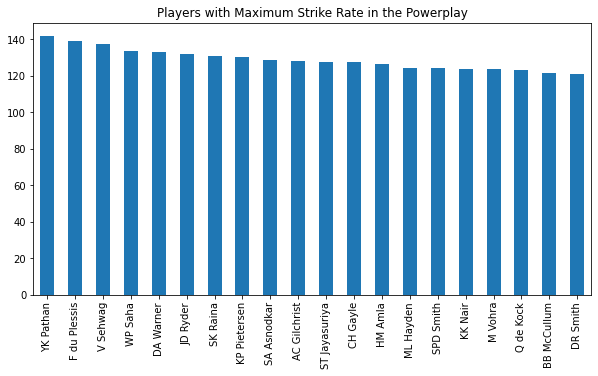

In [13]:
plt.figure(figsize=(10,5))

total_runs=deliveries[deliveries['over']<7].groupby(by='batsman').sum().sort_values('batsman_runs',ascending=False).batsman_runs
total_balls=deliveries[deliveries['over']<7].batsman.value_counts()
strike_rate=total_runs/total_balls*100
strike_rate.name='Strike_Rate'
#strike_rate=strike_rate.sort_values(ascending=False).head(20)
batsman_analysis=pd.concat([total_runs,total_balls,strike_rate],axis=1)
batsman_analysis=batsman_analysis[batsman_analysis['batsman']>200]
batsman_analysis.sort_values('Strike_Rate',ascending=False).head(20).Strike_Rate.plot(kind='bar', title='Players with Maximum Strike Rate in the Powerplay')

<AxesSubplot:title={'center':'Maximim Balls Bowled'}>

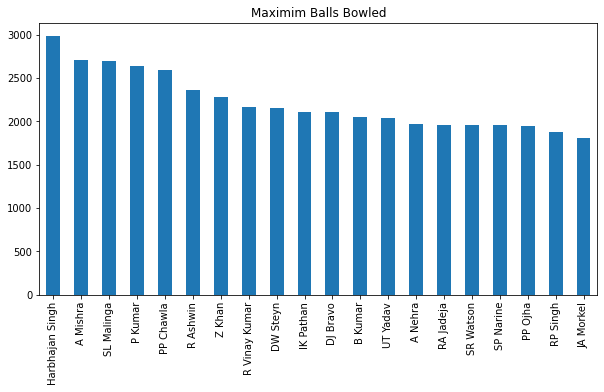

In [162]:
plt.figure(figsize=(10,5))
deliveries['bowler'].value_counts().head(20).plot(kind='bar',title='Maximim Balls Bowled')

In [57]:
max_dismissal = pd.DataFrame(columns = ["bowler", "dismissal_kind", "batsman"])
batsmen=deliveries.batsman.unique()
for x in batsmen:
    current=deliveries[deliveries['batsman']==x]
    current=current[current['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
    current=current.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
    current['batsman']=x
    max_dismissal = pd.concat([max_dismissal, current], ignore_index=True)
max_dismissal=max_dismissal.sort_values(by='dismissal_kind',ascending=0,ignore_index=True)
max_dismissal=max_dismissal[["batsman","bowler", "dismissal_kind"]]
max_dismissal.rename(columns={'batsman': 'Batsman', 'bowler': 'Bowler', 'dismissal_kind':'Dismissed_Times'},inplace=True)
max_dismissal.head(10)

,Batsman,Bowler,Dismissed_Times
0,MS Dhoni,Z Khan,7
1,AM Rahane,B Kumar,6
2,V Kohli,A Nehra,6
3,RG Sharma,R Vinay Kumar,6
4,G Gambhir,Z Khan,6
5,SK Raina,Harbhajan Singh,5
6,AT Rayudu,MM Sharma,5
7,PA Patel,B Kumar,5
8,SR Watson,AR Patel,5
9,KC Sangakkara,R Sharma,5


<AxesSubplot:title={'center':'Sixes by Player'}>

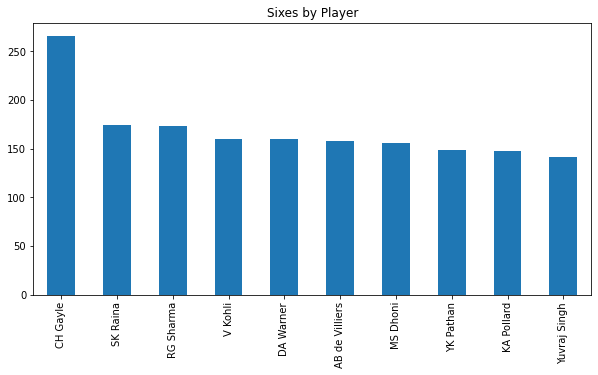

In [163]:
plt.figure(figsize=(10,5))
deliveries[deliveries['batsman_runs']==6]['batsman'].value_counts().head(10).plot(kind='bar',title='Sixes by Player')

<AxesSubplot:title={'center':'Boundaries by Player'}>

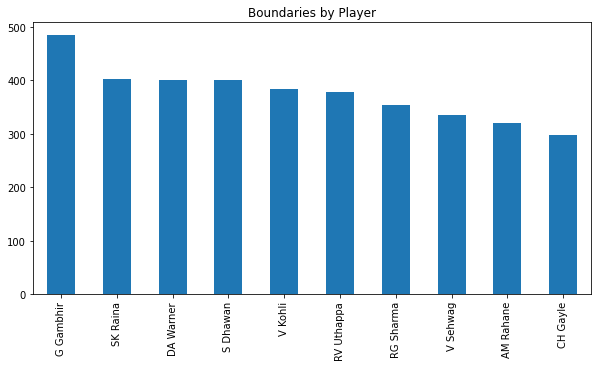

In [164]:
plt.figure(figsize=(10,5))
deliveries[deliveries['batsman_runs']==4]['batsman'].value_counts().head(10).plot(kind='bar',title='Boundaries by Player')

<AxesSubplot:title={'center':'Sixes by Team'}>

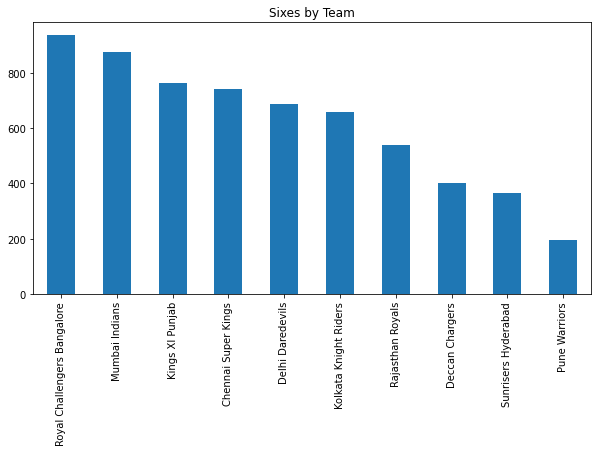

In [165]:
plt.figure(figsize=(10,5))
deliveries[deliveries['batsman_runs']==6]['batting_team'].value_counts().head(10).plot(kind='bar',title='Sixes by Team')

<AxesSubplot:title={'center':'Boundaries by Team'}>

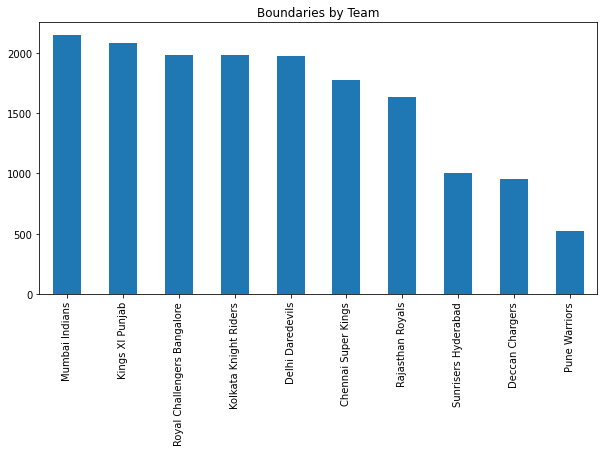

In [166]:
plt.figure(figsize=(10,5))
deliveries[deliveries['batsman_runs']==4]['batting_team'].value_counts().head(10).plot(kind='bar',title='Boundaries by Team')

<AxesSubplot:title={'center':'wickets'}>

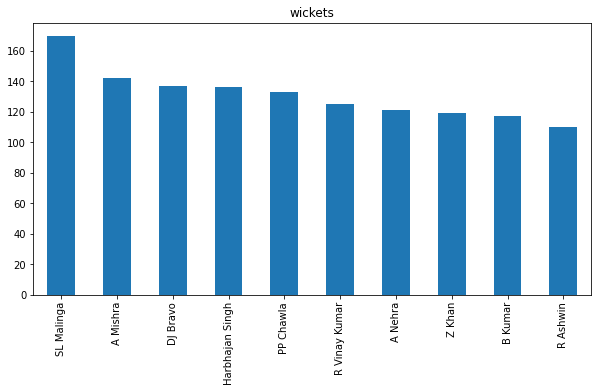

In [167]:
plt.figure(figsize=(10,5))
deliveries[pd.notnull(deliveries['dismissal_kind'])]['bowler'].value_counts().head(10).plot(kind='bar', title='wickets')

<AxesSubplot:title={'center':'Extra Runs'}, xlabel='bowler'>

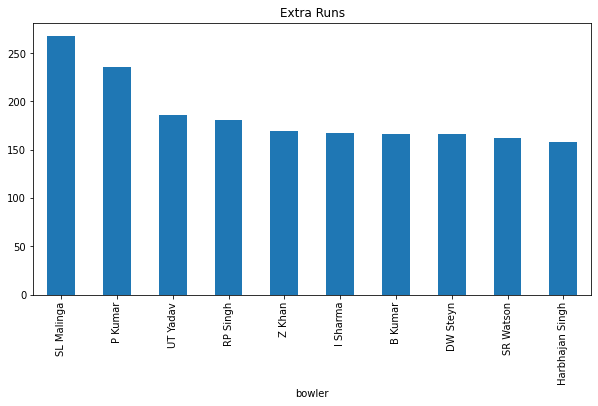

In [168]:
plt.figure(figsize=(10,5))
deliveries.groupby(by='bowler').sum().sort_values('extra_runs',ascending=False).extra_runs.head(10).plot(kind='bar',title='Extra Runs')

<AxesSubplot:title={'center':'Dot Balls'}, xlabel='bowler'>

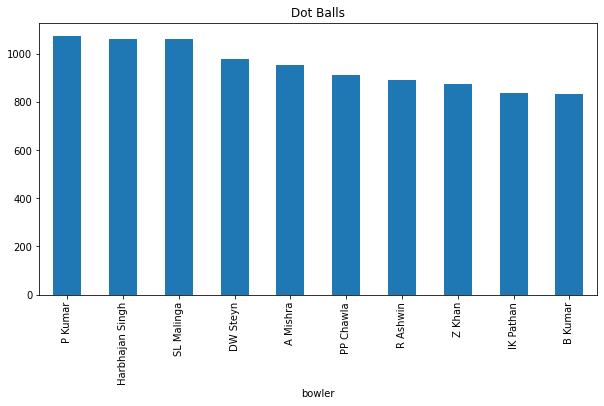

In [169]:
plt.figure(figsize=(10,5))
deliveries[deliveries['total_runs']==0].groupby(by='bowler').count().sort_values('total_runs',ascending=False).total_runs.head(10).plot(kind='bar',title='Dot Balls')

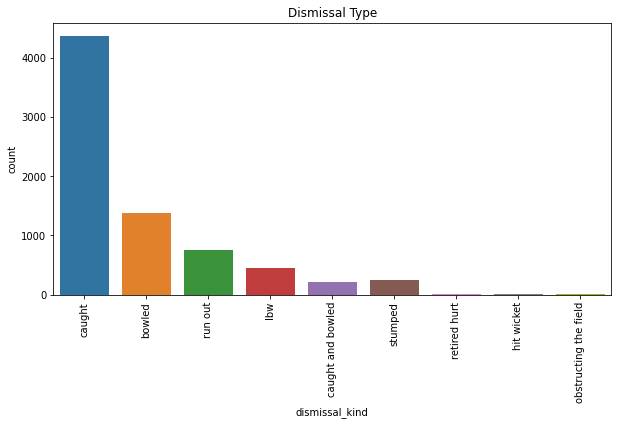

In [170]:
plt.figure(figsize=(10,5))
sns.countplot(deliveries.dismissal_kind)
plt.xticks(rotation='vertical')
plt.title('Dismissal Type')
plt.show()

In [3]:
#matches_season=matches.drop_duplicates(subset=['season'], keep='last')[['id','season']].reset_index(drop=True)
def insert_season(cols):
    val=cols[0]
    if val<=59:
        return 2017
    elif val<=117:
        return 2008
    elif val<=174:
        return 2009
    elif val<=234:
        return 2010
    elif val<=307:
        return 2011
    elif val<=381:
        return 2012
    elif val<=457:
        return 2013
    elif val<=517:
        return 2014
    elif val<=576:
        return 2015
    else:
        return 2016
deliveries['season']=deliveries[['match_id']].apply(insert_season,axis=1)


<AxesSubplot:title={'center':'Sixes per Season'}, xlabel='season'>

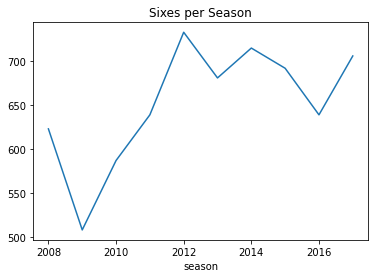

In [32]:
deliveries[deliveries['batsman_runs']==6].groupby(by='season').count()['batsman_runs'].plot(kind='line',title='Sixes per Season')

<AxesSubplot:title={'center':'Boundaries per Season'}, xlabel='season'>

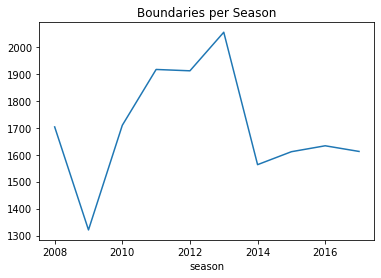

In [33]:
deliveries[deliveries['batsman_runs']==4].groupby(by='season').count()['batsman_runs'].plot(kind='line',title='Boundaries per Season')

In [54]:
sixes_season=deliveries[deliveries['batsman_runs']==6].groupby(by='season').count()['batsman_runs']
sixes_season.name='Total_Sixes'
matches_season=matches['season'].value_counts(sort=False)
matches_season.name='Total_Matches'
avg_sixes_season=sixes_season/matches_season
avg_sixes_season
#

season
2008    10.741379
2009     8.912281
2010     9.783333
2011     8.753425
2012     9.905405
2013     8.960526
2014    11.916667
2015    11.728814
2016    10.650000
2017    11.966102
dtype: float64

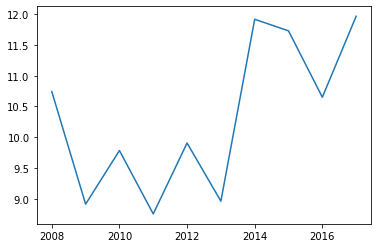

In [55]:
plt.plot(avg_sixes_season.index,avg_sixes_season)

Text(0.5, 1.0, 'Top 10 Highest Wicket-Takers categorized by Type of Wicket Taken')

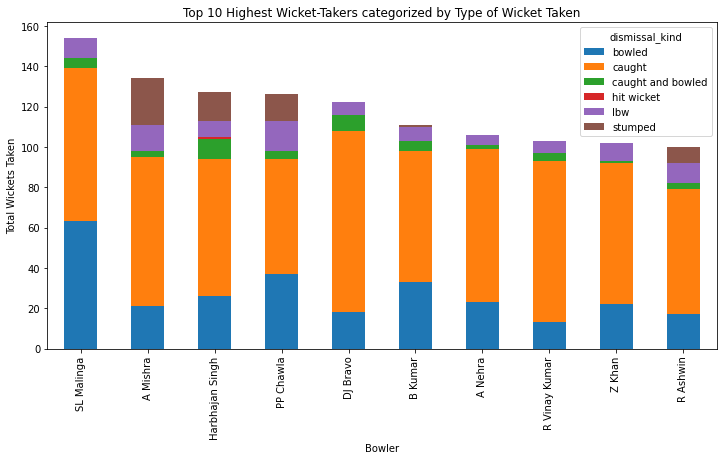

In [55]:
w_types=deliveries.dismissal_kind.unique()
w=[1,2,4,5,6,8]
w_types=[w_types[x] for x in w]

temp=deliveries[deliveries['dismissal_kind'].isin(w_types)].groupby(by=['bowler','dismissal_kind']).dismissal_kind.count().unstack(fill_value = 0)
temp['total']=temp.sum(axis=1)

temp=temp.sort_values('total',ascending=False).drop('total',axis=1).head(10).plot(kind='bar',figsize = (12,6),stacked=True)
plt.xlabel("Bowler")
plt.ylabel("Total Wickets Taken")
plt.title("Top 10 Highest Wicket-Takers categorized by Type of Wicket Taken")

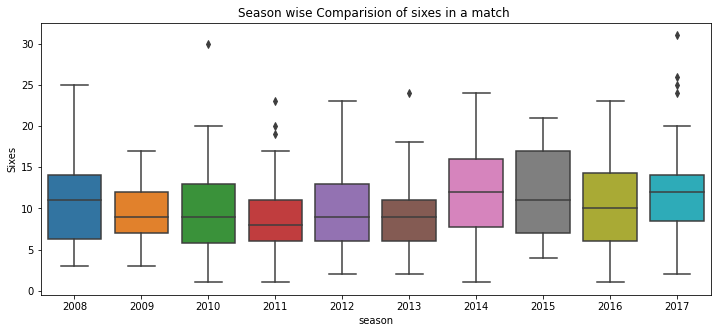

In [137]:
temp=deliveries[deliveries['batsman_runs']==6].groupby(['season','match_id'])['batsman_runs'].count()
temp.name='Sixes'
df=pd.DataFrame(temp)
df.reset_index(inplace=True)
plt.figure(figsize=(12,5))
sns.boxplot(x=df.season,y=df.Sixes)
plt.title("Season wise Comparision of sixes in a match ")
plt.show()

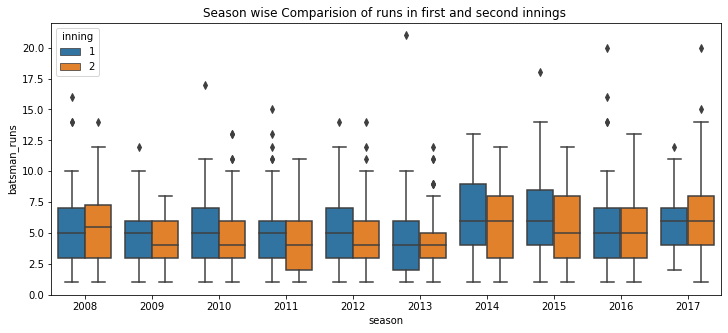

In [140]:
temp=deliveries[(deliveries['batsman_runs']==6) & (deliveries['inning']<3)].groupby(['season','match_id','inning'])['batsman_runs'].count()
temp=pd.DataFrame(temp)
temp.reset_index(inplace=True)

plt.figure(figsize=(12,5))
sns.boxplot(temp.season,temp.batsman_runs,hue=temp.inning)
plt.title("Season wise Comparision of sixes in first and second innings ")
plt.show()


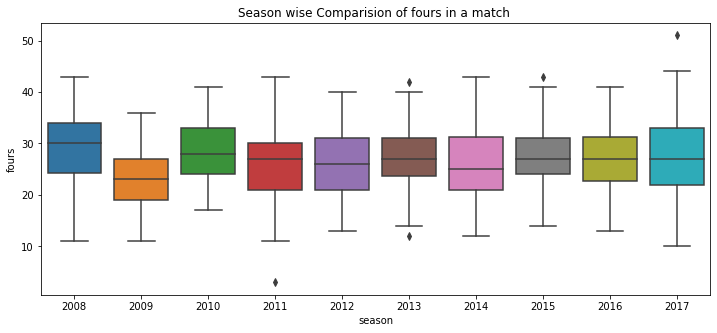

In [131]:
temp=deliveries[deliveries['batsman_runs']==4].groupby(['match_id','season'])['batsman_runs'].count()
temp.name='fours'
temp=pd.DataFrame(temp)
temp.reset_index(inplace=True)

plt.figure(figsize=(12,5))
sns.boxplot(temp.season,temp.fours)
plt.title("Season wise Comparision of fours in a match ")
plt.show()

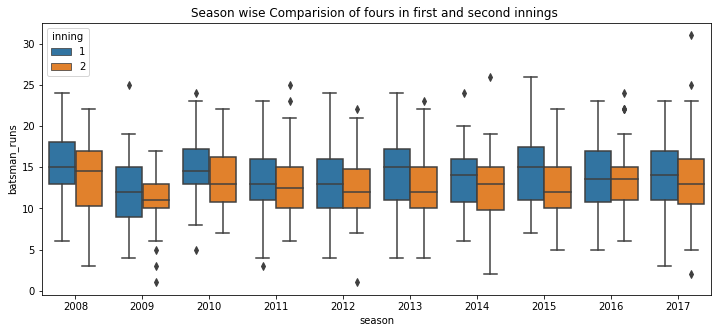

In [141]:
temp=deliveries[(deliveries['batsman_runs']==4) & (deliveries['inning']<3)].groupby(['season','match_id','inning'])['batsman_runs'].count()
temp=pd.DataFrame(temp)
temp.reset_index(inplace=True)

plt.figure(figsize=(12,5))
sns.boxplot(temp.season,temp.batsman_runs,hue=temp.inning)
plt.title("Season wise Comparision of fours in first and second innings ")
plt.show()

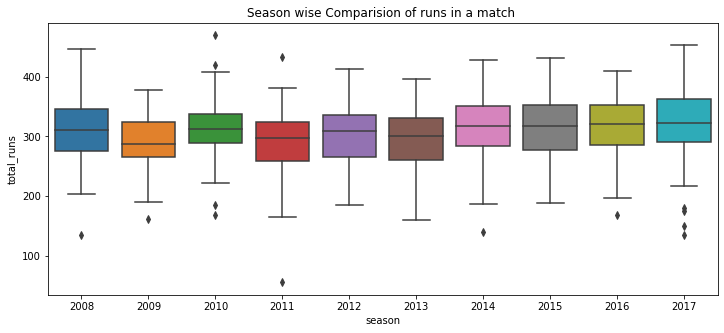

In [128]:
temp=deliveries.groupby(['match_id','season'])['total_runs'].sum()
temp=pd.DataFrame(temp)
temp.reset_index(inplace=True)

plt.figure(figsize=(12,5))
sns.boxplot(temp.season,temp.total_runs)
plt.title("Season wise Comparision of runs in a match ")
plt.show()

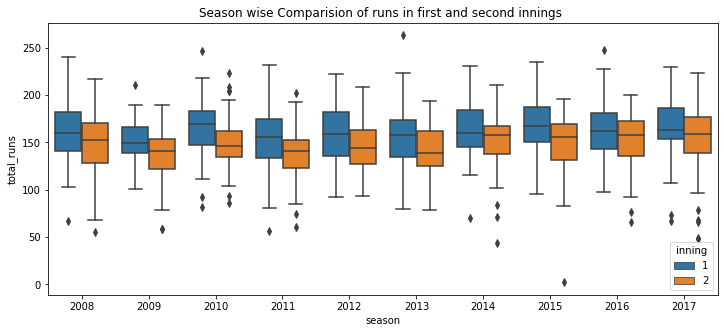

In [129]:
temp=deliveries[deliveries['inning']<3].groupby(['match_id','season','inning'])['total_runs'].sum()
temp=pd.DataFrame(temp)
temp.reset_index(inplace=True)

plt.figure(figsize=(12,5))
sns.boxplot(temp.season,temp.total_runs,hue=temp.inning)
plt.title("Season wise Comparision of runs in first and second innings ")
plt.show()